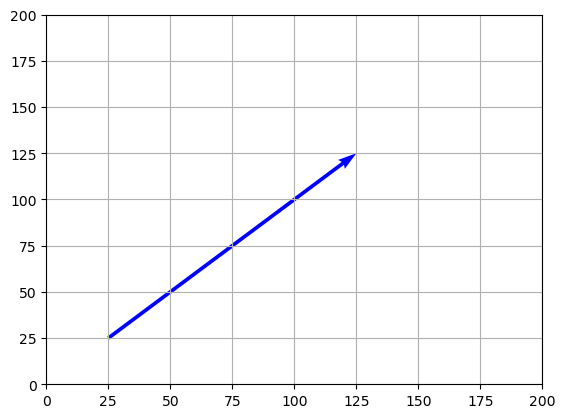

In [16]:

# Import libraries 
import numpy as np 
import matplotlib.pyplot as plt 
# Vector origin location 
# X = [100, 0] 
# Y = [100, 0] 
# # Directional vectors 
# U = [100, 100]   
# V = [52.916666, 100]   

X = [25]
Y = [25]
U = [100]
V = [100]
# Creating plot 
plt.quiver(X, Y, U, V, color='b', units='xy', scale=1, angles = 'xy', scale_units = 'xy') 

# x-lim and y-lim 
plt.xlim(0, 200) 
plt.ylim(0, 200) 
  
# Show plot with grid 
plt.grid() 
plt.show() 

In [ ]:
class SingleVector:
    def __init__(self, xBegin, yBegin, xDelta, yDelta ):
        self.xBegin = float(xBegin)
        self.yBegin = float(yBegin)
        self.xDelta = float(xDelta)
        self.yDelta = float(yDelta)
class VectorFieldImage:
    def  __init__(self, width, height):
        self.width = float(width)
        self.height = float(height)
        self.vectorList = []
    def addVector(self, vectorAdd):
        self.vectorList.append(vectorAdd)
    def printAllVectors(self):
        for vector in self.vectorList:
            
            print(vector.xBegin, vector.yBegin, vector.xEnd, vector.yEnd)
    def graphVectors(self):
        x_begin = []
        y_begin = []
        x_end = []
        y_end = []
        for vector in self.vectorList:
            x_begin.append(vector.xBegin)
            y_begin.append(vector.yBegin)
            x_end.append(vector.xDelta)
            y_end.append(vector.yDelta)
        plt.quiver(x_begin, y_begin, x_end, y_end, color='b', units='xy', scale=1,  angles = 'xy', scale_units = 'xy', width=0.3, headaxislength= 0.1, headlength = 0.5, headwidth = 0.5)
        plt.xlim(0, self.width) 
        plt.ylim(0, self.height) 
        plt.show()


132.29166 132.29167


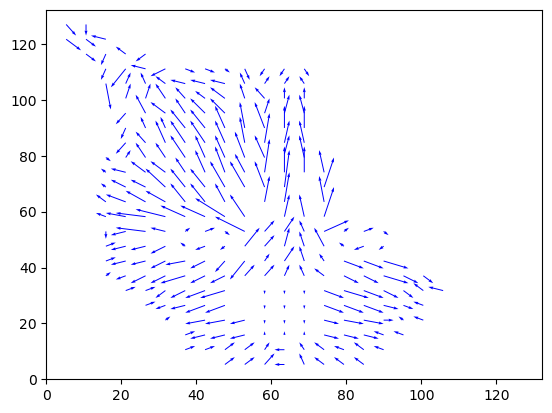

In [42]:
# Write something to convert one type of vector to another
import xml.etree.ElementTree as ET
tree = ET.parse("drawingInkscape.svg")
root = tree.getroot()

# find all svg namespaces
namespace = {"svg": "http://www.w3.org/2000/svg"}

viewBox = root.get("viewBox")
_, _, width, height = viewBox.split()
baseSVG = VectorFieldImage(width, height)

#custom set this if need be?
xOffset = 0.0
yOffset = -164.70831
for path in root.findall(".//svg:path", namespace):
    
    d_value = path.get("d")
    split_d_value = d_value.split()
    xBegin, yBegin  = split_d_value[1].split(",")
    xEnd, yEnd = split_d_value[2].split(",")
    if (split_d_value[0] == "M"):
        baseSVG.addVector(SingleVector(xBegin = float(xBegin) + xOffset,
                                    yBegin = (float(height) - (float(yBegin) - yOffset)),
                                    xDelta =  float(xEnd)  - float(xBegin),
                                    yDelta = (float(height) - (float(yEnd) - yOffset)) - (float(height) - (float(yBegin) - yOffset))
                                    ))
    elif (split_d_value[0] == "m"):
        baseSVG.addVector(SingleVector(xBegin = float(xBegin) + xOffset,
                                    yBegin = (float(height) - (float(yBegin) + yOffset)),
                                    xDelta =  float(xEnd),
                                    yDelta = - (float(yEnd))
                                    ))


print(width,height)
baseSVG.graphVectors()

In [27]:
baseSVG.printAllVectors

<bound method VectorFieldImage.printAllVectors of <__main__.VectorFieldImage object at 0x000001C9AF42D450>>

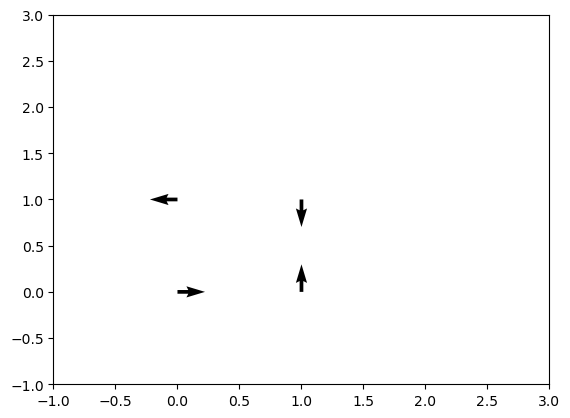